<a href="https://colab.research.google.com/github/oisteef/Ola-mundo/blob/main/Cohab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 49.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Cadastro dos pretendentes de moradias populares de Curitiba. COHAB

In [5]:
dados_curitiba = pd.read_csv("https://mid.curitiba.pr.gov.br/dadosabertos/PretendentesCohab/2020-11-03_FILA_-_Base%20De%20Dados.csv" , sep="," , encoding='latin')
dados_curitiba

,id,data_inscricao,data_validade,condicao_especial,faixa_renda,bairro,cidade,data_lote
0,1,30/12/86,07/2021,Mulher,FAIXA 3 (mais de 3275),NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES,Campo Largo,03/11/20 10:28
1,2,26/04/88,07/2021,Mulher,FAIXA 1 (menos de 1600),Campo Comprido,Curitiba,03/11/20 10:28
2,3,17/05/88,04/2021,Mulher,FAIXA 2 (entre 1600 e 3275),Cidade Industrial,Curitiba,03/11/20 10:28
3,4,12/07/90,01/2021,Nenhum critério atingido,FAIXA 3 (mais de 3275),Cidade Industrial,Curitiba,03/11/20 10:28
4,5,03/07/89,04/2020,Mulher,FAIXA 1 (menos de 1600),Capão da Imbuia,Curitiba,03/11/20 10:28
...,...,...,...,...,...,...,...,...
41770,41771,29/10/20,10/2021,Mulher,FAIXA 1 (menos de 1600),Cidade Industrial,Curitiba,03/11/20 10:28
41771,41772,03/11/20,11/2021,"Mulher, Até 3 filhos menores",FAIXA 3 (mais de 3275),PLANTA BAIRRO WEISSÓPOLIS,Pinhais,03/11/20 10:28
41772,41773,03/11/20,11/2021,Nenhum critério atingido,FAIXA 2 (entre 1600 e 3275),Capão Raso,Curitiba,03/11/20 10:28
41773,41774,03/11/20,11/2021,Mulher,FAIXA 2 (entre 1600 e 3275),Pinheirinho,Curitiba,03/11/20 10:28


In [6]:
dados_curitiba['condicao_especial'].describe()    #contém 41775 valores não nulos, com 50 valores únicos. "Mulher" é o valor mais comum, aparecendo 10778 vezes.

count      41775
unique        50
top       Mulher
freq       10778
Name: condicao_especial, dtype: object

In [7]:
dados_curitiba['cidade'].describe()

count        41750
unique          20
top       Curitiba
freq         37788
Name: cidade, dtype: object

In [8]:
dados_curitiba['id'].describe()

count    41775.000000
mean     20888.000000
std      12059.548084
min          1.000000
25%      10444.500000
50%      20888.000000
75%      31331.500000
max      41775.000000
Name: id, dtype: float64

In [164]:
dados_curitiba['bairro'].describe()

count                 40683
unique                  417
top       Cidade Industrial
freq                   5123
Name: bairro, dtype: object

In [9]:
dados_curitiba.groupby(by='id')['bairro'].max().sort_values(ascending=False)

id
27743    Área Rural de Curitiba
5377     Área Rural de Curitiba
28790    Área Rural de Curitiba
8536                 Água Verde
22340                Água Verde
                  ...          
41468                       NaN
41547                       NaN
41550                       NaN
41640                       NaN
41767                       NaN
Name: bairro, Length: 41775, dtype: object

In [166]:
print(dados_curitiba['bairro'].unique())

['NÚCLEO HABITACIONAL DOUTOR ABRANCHES GUIMARÃES' 'Campo Comprido'
 'Cidade Industrial' 'Capão da Imbuia' 'Pilarzinho' 'Boqueirão'
 'Santo Inácio' 'Hauer' 'Novo Mundo' 'Cajuru' 'Uberaba' 'NAÇÕES'
 'Boa Vista' 'PLANTA QUISSISSANA' 'Cascatinha' 'Alto Boqueirão' 'Centro'
 'Portão' 'VILA JULIANA' 'Rebouças' 'Parolin' 'Santa Felicidade'
 'Sítio Cercado' 'JARDIM RIO VERDE' 'Prado Velho' nan 'Bairro Alto'
 'Capão Raso' 'Barreirinha' 'Cristo Rei' 'Atuba' 'São Francisco'
 'São Braz' 'Jardim Botânico' 'Pinheirinho' 'Umbará' 'CAMPINA DA BARRA'
 'Fanny' 'Abranches' 'Xaxim' 'CRUZEIRO' 'MIRINGUAVA' 'Mercês' 'Tatuquara'
 'GUARITUBA' 'Fazendinha' 'PASSAUNA' 'Bairro Novo' 'Água Verde'
 'BOQUEIRÃO' 'Santa Cândida' 'BOA VISTA' 'Jardim Social' 'GRALHA AZUL'
 'Orleans' 'Bigorrilho' 'CAMPO PEQUENO' 'Guaíra' 'Butiatuvinha'
 'EUCALIPTOS' 'Vila Izabel' 'HABITAL BRASIL' 'Jardim das Américas'
 'JARDIM ANA ROSA II' 'IPÊ' 'FAZENDA VELHA' 'ROÇA GRANDE'
 'Campina do Siqueira' 'JARDIM ATUBA I' 'Santa Quitéria' 'São J

In [167]:
print(dados_curitiba['bairro'].count())

40683


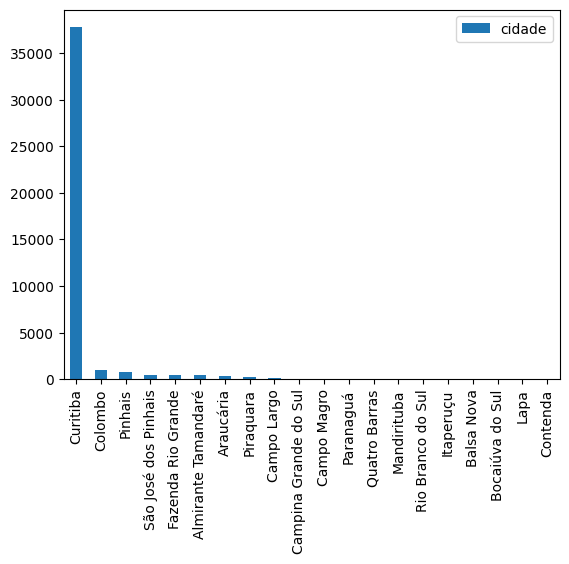

In [24]:
dados_filtrados = dados_curitiba[dados_curitiba['cidade'].notnull()]
dados_curitiba['cidade'].value_counts().plot(kind='bar', legend=True)
plt.show()

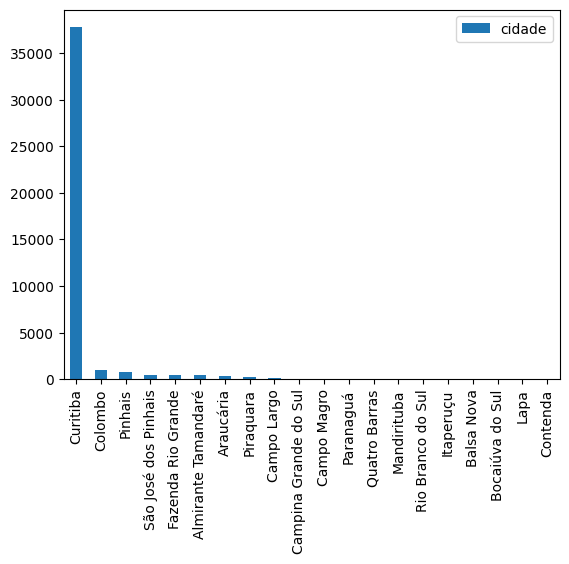

In [15]:
dados_curitiba['cidade'].value_counts().plot(kind='bar', legend=True)
plt.show()
